In [1]:
import matplotlib.pyplot as plt
plt.style.use('../styles/gcpeixoto-book.mplstyle')

(cap:modelagem)=
# Modelagem Integrada: Uma Ferramenta para Compreender e Simular o Mundo Real

<div class="chapter-thumb">
    <div class="chapter-oa">
        <h2>Objetivos de aprendizagem</h2>
        <ul>
        <li>Compreender modelos matemáticos aplicados às ciências computacionais e engenharias;</li>
	    <li>Reconhecer as principais classes de métodos numéricos para resolução de problemas computacionais;</li>
	    <li>Identificar recursos de programação disponíveis para integração entre métodos clássicos e guiados por dados;</li>
	    <li> Refletir sobre o papel e relevância da engenharia computacional para um mundo centrado em dados.</li>
        </ul>
    </div>        
    <div class="quote-box">
        <p><em> "(...) sempre que um artífice contempla constantemente aquilo que é imutável, 
        tomando isso como seu modelo, ele reproduzirá sua forma e sua natureza; 
        e tudo o que ele produz dessa maneira será, necessariamente, belo. 
        Mas, se ele volta seu olhar para algo que já veio a ser, utilizando
        um modelo gerado [mutável], sua obra não será bela." (Timeu, ~360 a.C.) 
        </p></em>
    </div>        
</div>

Ao se deparar com um problema do mundo real, profissionais dos mais diversos setores da economia buscam as melhores estratégias disponíveis em seu campo de atuação para resolvê-lo. Se considerarmos que um problema específico possui uma única solução bem definida, podemos pensar nele como uma pergunta precisa — e a estratégia adotada para respondê-la corresponde ao método de solução.

Em outras palavras, resolver um problema é responder a uma pergunta, e o caminho até essa resposta é guiado por métodos — sejam eles empíricos, analíticos ou computacionais. Neste livro, definimos por _modelagem integrada_ o processo de construir modelos matemáticos, implementar soluções computacionais e analisá-las através de recursos visuais.

Aqui estão alguns exemplos de perguntas que frequentemente surgem como ponto de partida na modelagem de problemas em diferentes áreas do conhecimento:

- **Engenharia Civil**: Qual é a carga máxima admissível para um elevador de um edifício-garagem de 15 andares, de forma que seus cabos, mecanismos e estruturas não sejam danificados por excesso de tensão?

- **Biologia**: Quantos mililitros de um fármaco anti-alérgico podem ser administrados por minuto na corrente sanguínea de um paciente, garantindo eficácia sem risco de overdose?

- **Engenharia Mecânica**: Qual é a magnitude mínima de pressão necessária para mover um fluido refrigerante através de um nanotubo, de modo a reduzir a temperatura de um componente eletrônico em 2%?

- **Engenharia da Computação**: Qual é o tempo estimado de vida útil de um microprocessador que opera 16 horas por dia, em alto _clock_, sob tensão de 1,46 V, com resfriamento contínuo?

- **Ciência de Dados**: Dada uma cidade com 1.5 milhão de habitantes, com registros históricos de mobilidade urbana (ônibus, bicicletas, aplicativos de transporte, sensores de tráfego) e dados meteorológicos, como podemos estimar, em tempo real, o tempo médio de deslocamento entre dois pontos quaisquer da cidade, considerando não apenas o fluxo atual, mas também prevendo mudanças associadas a eventos climáticos (como chuva intensa) ou grandes eventos (shows, jogos, etc.)?

Naturalmente, perguntas como essas não são triviais de responder. Elas frequentemente exigem uma abordagem multidisciplinar, reunindo profissionais com conhecimentos complementares. Por exemplo:

- A questão do elevador pode envolver especialistas em ciência dos materiais, eletrônica e sistemas mecânicos.

- A questão do fármaco exige interação entre matemáticos aplicados, farmacologistas e médicos.

- O problema do nanotubo pode mobilizar engenheiros mecânicos, físicos e especialistas em nanotecnologia.

- Já o cálculo da vida útil de um microprocessador pode requerer conhecimentos em engenharia elétrica, térmica, química de materiais e confiabilidade computacional.

- O problema de mobilidade urbana pode requerer ação conjunta de estatísticos, cientistas e engenheiros de dados, bem como de especialistas em transporte e clima.

Resolver um problema científico ou de engenharia no mundo atual exige mais do que domínio teórico e prático. É fundamental também possuir habilidades em pensamento computacional, capazes de traduzir fenômenos físicos, biológicos ou industriais em modelos matemáticos e algoritmos, que possam ser resolvidos por meio do enorme poder da computação moderna — seja local, distribuída ou na nuvem.

De fato, a maioria dos grandes desafios contemporâneos simplesmente não pode ser resolvida sem o uso de métodos numéricos. Isso vale desde a simulação de um motor de foguete até a modelagem da propagação de uma epidemia.

Embora existam inúmeras abordagens e técnicas, o processo de resolução de um problema aplicado segue, em geral, quatro grandes etapas, conforme ilustrado na {numref}`passos-modelagem`.

```{figure} ../figs/passos-modelagem.png
---
height: 130px
name: passos-modelagem
---
Etapas básicas para a resolução de problemas aplicados por modelagem integrada.
```

## Modelos matemáticos

Um modelo matemático pode ser definido, de forma geral, como uma formulação — tipicamente na forma de uma ou mais equações — que descreve as características essenciais de um sistema ou processo físico em termos quantitativos. Essa formulação pode variar desde uma simples equação algébrica até um sistema extenso e complexo de equações diferenciais, integrais ou estatísticas.

Por exemplo, com base em suas observações, Isaac Newton formulou sua segunda lei do movimento, que estabelece uma relação direta entre a força resultante aplicada a um corpo e a sua aceleração. Se expressarmos a taxa de variação temporal da velocidade por meio da derivada $\dfrac{d\vec{v}}{dt}$, obtemos um modelo matemático da segunda lei:

$$
\dfrac{d\vec{v}}{dt} = \dfrac{\vec{F}}{m},
$$

em que $\vec{F}$ representa a força resultante aplicada ao corpo e $m$ é sua massa.

Modelos matemáticos como este geralmente possuem as seguintes características fundamentais:

- Descrição formal: representam um sistema físico, químico, biológico ou qualquer outro fenômeno por meio de relações matemáticas bem definidas;
- Idealização: são simplificações da realidade. Ao construir um modelo, selecionam-se as variáveis e os aspectos considerados mais relevantes para o fenômeno, ignorando-se certos detalhes que são julgados menos significativos no contexto do problema;
- Capacidade preditiva: permitem realizar simulações, previsões e análises. Por exemplo, conhecendo-se a força aplicada a um corpo e sua massa, o modelo permite estimar sua aceleração $\vec{a} = \dfrac{d\vec{v}}{dt}$ em qualquer instante.

Para ilustrar, consideremos um paraquedista em queda livre. Durante o movimento, duas forças principais atuam sobre ele: a força gravitacional $\vec{F}_G$, orientada para baixo, e a força de resistência do ar (ou arrasto) $\vec{F}_D$, orientada no sentido oposto ao do movimento.

Assumindo um movimento unidimensional (reduzindo a equação vetorial a uma equação escalar) e adotando como sentido positivo aquele da força gravitacional, a força resultante pode ser modelada como:

$$
F = F_G - F_D = mg - cv,
$$

onde $g$ é a aceleração da gravidade, $c$ é o coeficiente de arrasto, com unidades de $kg/s$ e $v$ é a velocidade do corpo.

```{admonition} Curiosidade: Modelagem do arrasto 
:class: dropdown
A suposição de que o arrasto é proporcional à velocidade, $F_D = cv$, é uma simplificação válida em regimes de velocidades baixas ou em certos fluidos. Na realidade, especialmente em velocidades mais altas, a força de arrasto costuma ser proporcional ao quadrado da velocidade, ou seja, $F_D = c v^2$. A aproximação linear facilita a obtenção de soluções analíticas, mas deve ser aplicada com critério, dependendo do contexto físico.
```

Aplicando a segunda lei de Newton ($F = ma = m\dfrac{dv}{dt}$), obtemos a seguinte equação diferencial ordinária (EDO) que descreve a evolução da velocidade com o tempo:

$$
\dfrac{dv}{dt} = \dfrac{mg - cv}{m} = g - \dfrac{c}{m}v.
$$

Esta EDO admite solução por métodos analíticos clássicos. Se considerarmos a condição inicial de que o paraquedista parte do repouso ($v = 0$ quando $t = 0$), a solução particular da equação é:

$$
v(t) = \dfrac{mg}{c} \left(1 - e^{-\dfrac{c}{m}t}\right).
$$

Essa função descreve uma curva de crescimento exponencial, onde a velocidade aumenta rapidamente no início e, com o tempo, se aproxima de um valor constante, chamado de velocidade terminal:

$$
v_\text{terminal} = \dfrac{mg}{c}.
$$

```{admonition} Curiosidade: O que é, de fato, um "modelo"?
:class: dropdown

A palavra _modelo_ tem origem no latim medieval _modellus_, que é o diminutivo de _modus_, significando "medida", "modo", "forma" ou "maneira". Portanto, _modellus_ pode ser interpretado como "pequena medida", "forma reduzida" ou "representação simplificada de algo maior". Na transição para as línguas românicas, como o italiano e o português, o termo assumiu sentidos relacionados tanto à ideia de uma _representação física em escala_ (como uma maquete, uma miniatura) quanto à de uma _representação conceitual_, como um padrão, um molde ou uma abstração que orienta algum tipo de construção ou entendimento.

O uso de "modelo" no sentido científico e matemático é uma extensão moderna desse conceito, refletindo a ideia de criar uma representação controlada, simplificada e manipulável da realidade, que permite entender, prever ou projetar fenômenos. Ela permeia quase todas as áreas do conhecimento, mas com sentidos que podem variar bastante conforme o contexto:

- Na Engenharia, um modelo é, geralmente, uma representação matemática ou computacional de um sistema físico. Ele permite prever comportamentos, simular cenários e testar soluções antes de serem implementadas no mundo real.

- Na Estatística e na Ciência de Dados, um modelo frequentemente descreve uma relação matemática (determinística ou probabilística) entre variáveis. Por exemplo, uma regressão linear ou uma rede neural são modelos que mapeiam entradas em saídas, aprendendo padrões dos dados.

- Na Física, modelos podem ser tanto equações fundamentais (como as equações de Maxwell) quanto aproximações simplificadas que representam fenômenos complexos, como o modelo de corpo negro ou o modelo de partículas.

- Na Biologia, modelos podem ser esquemas conceituais (como o modelo da dupla hélice do DNA), modelos matemáticos populacionais (como o de Lotka-Volterra) ou até simulações computacionais de sistemas ecológicos e genéticos.

- Em Economia, modelos são frequentemente sistemas de equações que representam comportamentos humanos, mercados ou dinâmicas sociais, sempre sob a limitação de capturar a complexidade da interação humana.

Portanto, o termo “modelo” nunca é absoluto — ele é sempre uma abstração, uma simplificação útil da realidade, construída para responder uma pergunta específica. Um bom modelo não é aquele que representa tudo com perfeição (o que seria impossível), mas aquele que é adequado ao propósito, balanceando fidelidade, simplicidade e capacidade de gerar respostas úteis.
```

## Temas de aplicação

Todo o conteúdo de um curso básico sobre métodos numéricos tem por base alguma teoria matemática útil para resolver problemas que se encaixam nos temas discutidos abaixo. 

- **Raízes de equações não-lineares**: procuramos pelo(s) valor(es) de uma variável ou parâmetro que satisfaz(em) uma equação não-linear. Utilizamos métodos para localizar os chamados "zeros" da função e os aplicamos a diversos projetos onde aparecem equações impossíveis de serem resolvidas de forma explícita. Em geral, problemas nesta classe, em uma dimensão, para uma função $f$ não linear, podem ser descritos como:

> Encontre $x$, tal que $f(x) = 0$, para $x \in I \subset \mathbb{R}$.

- **Sistemas de equações em n-dimensões**: procuramos por vetores cujas componentes satisfazem simultaneamente a um sistema de $n$ equações lineares ou não-lineares. Nesta classe de problemas, em geral, uma matriz $\textbf{A}$ representa a estrutura interconectada de um sistema físico (estruturas mecânicas, circuitos elétricos, malhas hídricas etc.) e um vetor $\textbf{b}$ representa as condições impostas ao sistema (cargas, tensões, pressões etc.). No caso de um sistema linear $n\times n$, um problema recorrente é descrito por:

> Encontre $\textbf{x}_{n \times 1} \in I \subset \mathbb{R}^n$, tal que $\textbf{A}_{n \times n} \textbf{x}_{n \times 1} = \textbf{b}_{n \times 1}.$

- **Ajuste de curvas**: procuramos por equações que expressam curvas (retas, parábolas, exponenciais etc.) que explicam o comportamento de dados que puderam ser medidos experimentalmente e/ou foram estruturados na forma de tabelas. Problemas de ajuste de curvas competem à uma área denominada _Teoria da Aproximação_ e são divididos em duas categorias: _regressão_ e _interpolação_. Regressões são empregadas a casos onde há um grau significativo de erro associado aos dados ou quando se busca uma descrição "média" de como eles se comportam. Por outro lado, interpolações são usadas quando desejamos encontrar valores intermediários desconhecidos a partir de valores "vizinhos" conhecidos e, principalmente, quando os dados são relativamente livres de ruídos. Como esta classe de problemas associa-se fortemente a planilhas, uma forma simplificada de descrever suas aplicações é por meio de pares de dados. Assim, um problema típico de ajuste de curvas seria o seguinte:
	
> Dada a dispersão de pontos $\{(x_i,y_i)\}_{i = 1}^n$, determine $\phi$, tal que $y_i = \phi(x_i) + {\epsilon}_i$, para $i = 1,2,\ldots,n$. Se $\epsilon_i = 0 \ \ \forall i$, o problema é de interpolação. Senão, é de regressão.  

- **Integração numérica**: buscamos o valor aproximado da quantidade interpretada como "área sob a curva". Em sentido aplicado, integrações numéricas são realizadas quando a função integrando não admite uma antiderivada, ou quando não é simples de obtê-la por meios conhecidos (ex. integração por partes, substituição, frações parciais). Podem existir inúmeras situações onde a integração numérica é necessária, principalmente no cálculo de centroides, volumes, vazões, energia, entre outros. O problema geral da integração numérica é:

> Calcule $I$, tal que $I = \int_{a_1}^{b_1} \int_{a_2}^{b_2} \ldots \int_{a_n}^{b_n} f(x_1,x_2,\ldots,x_n) \, dx_1 \, dx_2 \ldots dx_n$.

Entretanto, para casos práticos, a dimensão máxima para o integrando costuma ser 3. Aprender a calcular integrais simples, duplas e triplas numericamente é suficiente para um enorme portfólio.


- **Diferenciação numérica e equações diferenciais ordinárias (EDOs)**: os problemas de EDOs atrelam-se aos mais diversos fenômenos físicos e leis que os governam. Geralmente, as taxas de variação de uma quantidade são mais importantes do que a quantidade em si. Métodos numéricos para EDOs utilizam _derivadas numéricas_ e são aplicados para fazer predições populacionais, estudar aceleração de corpos,  estimar transferências de quantidades (movimento, massa, calor etc.). Dois tipos de problemas surgem baseados em EDO: problemas de valor inicial (PVIs) e problemas valor de contorno (PVCs). PVIs partem do conhecimento de uma condição inicial para o sistema físico e os métodos numéricos ajudam a descobrir o comportamento posterior do sistema. PVCs são aplicados a problemas em que um dado domínio deve obedecer a certas restrições em sua fronteira ou borda (ex. fluxo de calor dependente da posição, temperatura fixa). Um exemplo de problema cuja solução da EDO dá-se por um algoritmo de "passo simples" seria:

> Dada $\dfrac{dy}{dt} \approx \dfrac{\Delta y}{\Delta t} = f(t,y)$, resolva para $y$ com $y_{i+1} = y_i + f(t_i,y_i)\Delta t$. 


- **Equações diferenciais parciais (EDPs)**: assim como EDOs, EDPs aplicam-se à modelagem de diversos fenômenos e leis físicas em que as taxas de variação de uma certa quantidade dependem de duas ou mais variáveis independentes. EDPs permeiam quase que a totalidade dos modelos complexos da realidade nas ciências exatas cujas variações ocorrem, especialmente no espaço ou no espaço-tempo (ex. comportamento de fluidos, processos químicos, fenômenos biológicos). Métodos numéricos para EDPs resolvem problemas como o seguinte:

> Dada $f(x,y)$, encontre $u(x,y)$ tal que $\dfrac{\partial^2 u}{\partial x^2} + \dfrac{\partial^2 u}{\partial x^2} = f(x,y), \ \ \forall (x,y) \in \mathbb{R}^2$.

## Motivações

### O salto de paraquedas de Yan e Celso 

Podemos estudar os saltos de paraquedas de Yan e de Celso, seu irmão, calculando a velocidade atingida por eles desde o salto até o momento da abertura do paraquedas. Na época em que saltou de paraquedas, Yan estava com 65 kg e o ar apresentava um coeficiente de arrasto estimado em 12,5 kg/s.

Utilizando a fórmula acima, podemos calcular a velocidade atingida por Yan em relação ao tempo. Vejamos como escrever um simples programa para calcular $v(t)$ nos 10 primeiros segundos do salto, que foi o tempo que Yan permaneceu em queda até a abertura do paraquedas.

v(t=0) = 0.0000 [m/s]
v(t=1) = 8.9153 [m/s]
v(t=2) = 16.2709 [m/s]
v(t=3) = 22.3397 [m/s]
v(t=4) = 27.3467 [m/s]
v(t=5) = 31.4778 [m/s]
v(t=6) = 34.8861 [m/s]
v(t=7) = 37.6982 [m/s]
v(t=8) = 40.0183 [m/s]
v(t=9) = 41.9325 [m/s]
v(t=10) = 43.5119 [m/s]
--> Abertura do paraquedas.


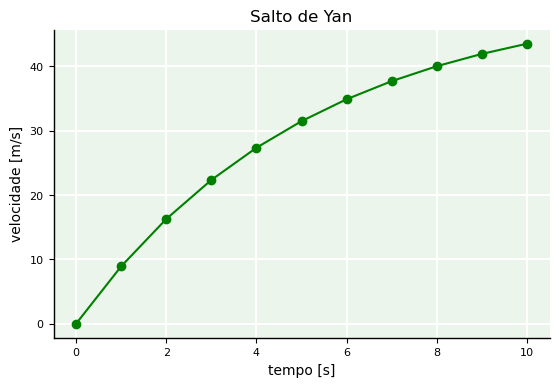

In [2]:
# velocidade no salto de Yan
from numpy import exp
from matplotlib.pyplot import subplots

v_yan = []
t = 0
while t <= 10:
    v = ((9.8 * 65)/12.5)*(1 - exp(-(12.5/65)*t))   
    v_yan.append(v)
    print(f'v(t={t}) = {v:.4f} [m/s]')
    t += 1
else:
    print('--> Abertura do paraquedas.')
    
# plotagem    
fig, ax = subplots()
ax.plot(v_yan,'o-g')
ax.set_xlabel('tempo [s]')
ax.set_ylabel('velocidade [m/s]')
ax.set_title('Salto de Yan');

Porém, Celso, irmão de Yan, também saltou com ele, em separado. Celso, tem mais 20kg a mais do que Yan. Então, vamos ver como a massa influenciou a velocidade no salto de Celso e comparas as curvas. Podemos usar o mesmo programa, porém alterar o valor da massa.

v(t=0) = 0.0000 [m/s]
v(t=1) = 9.1135 [m/s]
v(t=2) = 16.9806 [m/s]
v(t=3) = 23.7719 [m/s]
v(t=4) = 29.6344 [m/s]
v(t=5) = 34.6952 [m/s]
v(t=6) = 39.0638 [m/s]
v(t=7) = 42.8351 [m/s]
v(t=8) = 46.0905 [m/s]
v(t=9) = 48.9008 [m/s]
v(t=10) = 51.3268 [m/s]
--> Abertura do paraquedas.


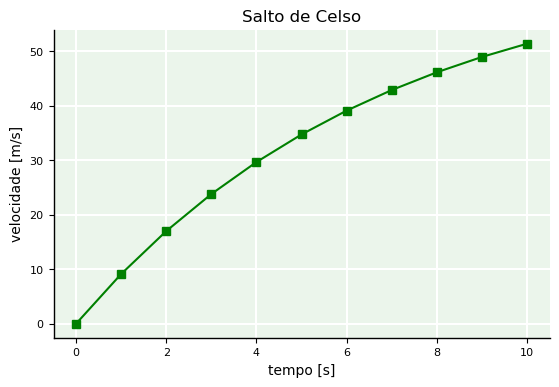

In [3]:
# velocidade no salto de Yan
from numpy import exp
from matplotlib.pyplot import subplots

v_celso = []
t = 0
while t <= 10:
    v = ((9.8 * (85))/12.5)*(1 - exp(-(12.5/85)*t))   
    v_celso.append(v)
    print(f'v(t={t}) = {v:.4f} [m/s]')
    t += 1
else:
    print('--> Abertura do paraquedas.')
    
# plotagem    
fig, ax = subplots()
ax.plot(v_celso,'s-g')
ax.set_xlabel('tempo [s]')
ax.set_ylabel('velocidade [m/s]')
ax.set_title('Salto de Celso');

Nossos cálculos mostram que, para 10 segundos, Yan e Celso atingiram velocidades de cerca de 43,51 m/s e 51,33 m/s, respectivamente. Em outras palavras, com 30% a mais de massa, Celso teve sua velocidade acrescida de 18% em relação à de Yan. Por isso, certamente chegou ao solo antes de seu irmão. 

Uma forma de aperfeiçoar o que fizemos seria escrever um código único, válido não só para os saltos de Yan e Celso, mas também para qualquer outra pessoa. Considerando a mesma condição do ambiente, seria mais ou menos assim:

v(t=0) = 0.0000 [m/s]
v(t=1) = 8.9153 [m/s]
v(t=2) = 16.2709 [m/s]
v(t=3) = 22.3397 [m/s]
v(t=4) = 27.3467 [m/s]
v(t=5) = 31.4778 [m/s]
v(t=6) = 34.8861 [m/s]
v(t=7) = 37.6982 [m/s]
v(t=8) = 40.0183 [m/s]
v(t=9) = 41.9325 [m/s]
v(t=10) = 43.5119 [m/s]
--> Abertura do paraquedas.
v(t=0) = 0.0000 [m/s]
v(t=1) = 9.1135 [m/s]
v(t=2) = 16.9806 [m/s]
v(t=3) = 23.7719 [m/s]
v(t=4) = 29.6344 [m/s]
v(t=5) = 34.6952 [m/s]
v(t=6) = 39.0638 [m/s]
v(t=7) = 42.8351 [m/s]
v(t=8) = 46.0905 [m/s]
v(t=9) = 48.9008 [m/s]
v(t=10) = 51.3268 [m/s]
--> Abertura do paraquedas.


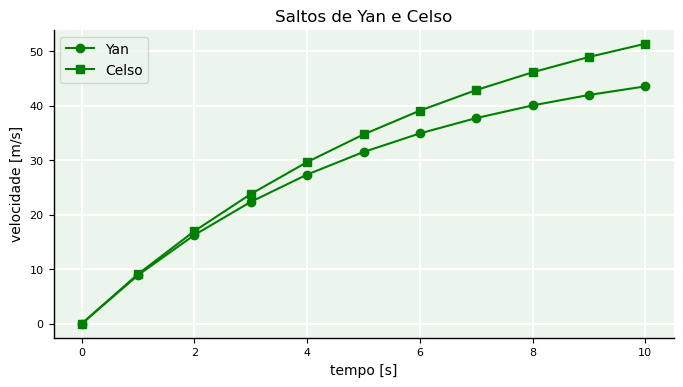

In [4]:
from numpy import arange, exp
from matplotlib.pyplot import subplots

def v(m,dt,T):

    # intervalo e velocidade
    t = arange(0,T+dt,dt)
    v = ((9.8 * m)/12.5)*(1 - exp(-(12.5/m)*t))   
    
    # impressão
    for ti in t:        
        print(f'v(t={ti}) = {v[ti]:.4f} [m/s]')
    print('--> Abertura do paraquedas.')
    
    # retorno
    return t,v
    

# cálculo para Yan, Celso
t_yan, v_yan = v(65,1,10)
t_celso, v_celso = v(85,1,10)

    
# plotagem    
fig, ax = subplots(figsize=(8,4))
ax.plot(t_yan,v_yan,'o-g',label='Yan')
ax.plot(t_celso,v_celso,'s-g',label='Celso')
ax.set_xlabel('tempo [s]')
ax.set_ylabel('velocidade [m/s]')
ax.set_title('Saltos de Yan e Celso')
ax.legend();


Este breve exemplo nos mostra a implementação de um modelo matemático em Python, onde utilizamos partes de programação _estruturada_ e _modular_. Estruturada, no sentido das instruções e modular no sentido de que aproveitamos os _módulos_ `numpy` e `matplotlib` para invocarmos a função exponencial `exp` e as funções de plotagem gráfica, especialmente `plot`.


#### Deslocamento até a abertura do paraquedas

Sabemos da Física e do Cálculo que o deslocamento é a integral da velocidade com relação ao tempo. Portanto, se $D_Y$ e $D_C$ foram os deslocamentos de Yan e Celso em seus saltos, podemo usar a integral:

$$D = \int_0^{10} v(t) \, dt,$$

em cada caso para computar esses deslocamentos. No Python, podemos fazer isso com o código abaixo (que você entenderá mais tarde como fazer).

In [5]:
from sympy import symbols, exp, integrate

# função v(t)
t,g,m,c = symbols('t g m c')
v = g*m/c*(1 - exp(-c/m*t))

# integração numérica
s1 = integrate(v,(t,0,10)).subs({'m':65.0,'g':9.8,'c':12.5})
s2 = integrate(v,(t,0,10)).subs({'m':85.0,'g':9.8,'c':12.5})

print(f'Yan voou incríveis DY = {s1:.2f} metros em 10 segundos!')
print(f'Celso voou incríveis DC = {s2:.2f} metros em 10 segundos!')

Yan voou incríveis DY = 283.34 metros em 10 segundos!
Celso voou incríveis DC = 317.38 metros em 10 segundos!


### Programação modular em cálculo vetorial

Dividir tarefas ou objetivos em partes mais simples é uma maneira de torná-los mais fáceis de programar e tratar. Pensando dessa maneira, o desenvolvimento modular permite que várias pessoas trabalhem em um mesmo código, sem que isso interfira no resultado final. Hoje em dia, todas as linguagens de programação modernas, tais como C++, Java, Javascript e a própria Python trabalham com o conceito de "orientação a objetos", permitindo que a manutençao facilitada e a reusabilidade dos códigos em programas posteriores sejam características diferenciais.

Abaixo, mostramos um exemplo avançado de como criar um módulo básico (uma classe) em Python para cálculo vetorial. Nosso módulo poderia ser salvo em um arquivo chamado `Ponto3D.py`, por exemplo, e utilizado em programas próprios que viermos a desenvolver. Neste exemplo, a _classe_ `Ponto3D` possui funções para realizar as seguintes operações: 

- criar um ponto no espaço real 3D;

- calcular a distância Euclidiana entre quaisquer dois pontos;

- calcular a área de um triângulo pela fórmula de Heron;

- calcular o centro de massa (baricentro) do triângulo;

- determinar o vetor normal ao triângulo que passa pelo baricentro; e

- imprimir as informações desses atributos.


In [6]:
import numpy as np
import matplotlib.pyplot as plt

class Ponto3D:
    """
    Classe para construir pontos no espaço 3D e calcular atributos.
    """
    
    def __init__(self, x, y, z=0.0):
        self.x = x
        self.y = y
        self.z = z

    # Representação do ponto
    def __repr__(self):
        return f"Ponto3D({self.x}, {self.y}, {self.z})"
    
    # Distância entre dois pontos
    @staticmethod
    def dist(P1, P2):
        return np.sqrt((P2.x - P1.x)**2 + (P2.y - P1.y)**2 + (P2.z - P1.z)**2)
    
    # Área do triângulo pela fórmula de Heron
    @staticmethod
    def area_heron(P1, P2, P3):
        a = Ponto3D.dist(P1, P2)
        b = Ponto3D.dist(P2, P3)
        c = Ponto3D.dist(P3, P1)
        p = 0.5 * (a + b + c)
        area = np.sqrt(p * (p - a) * (p - b) * (p - c))
        return area
    
    # Centro de massa (baricentro) do triângulo
    @staticmethod
    def centro_massa(P1, P2, P3):
        xc = (P1.x + P2.x + P3.x) / 3
        yc = (P1.y + P2.y + P3.y) / 3
        zc = (P1.z + P2.z + P3.z) / 3
        return Ponto3D(xc, yc, zc)
    
    # Vetor normal unitário ao plano definido pelos três pontos
    @staticmethod
    def vetor_normal_unitario(P1, P2, P3):
        
        # Vetores do plano
        v1 = np.array([P2.x - P1.x, P2.y - P1.y, P2.z - P1.z])
        v2 = np.array([P3.x - P1.x, P3.y - P1.y, P3.z - P1.z])
        
        # Produto vetorial
        n = np.cross(v1, v2)
        norma = np.linalg.norm(n)
        if norma == 0:
            raise ValueError("Os pontos são colineares e não definem um plano.")
        n_unit = n / norma
        return n_unit

    # Impressão dos resultados
    @staticmethod
    def imprime_info_triangulo(P1, P2, P3):
        area = Ponto3D.area_heron(P1, P2, P3)
        centro = Ponto3D.centro_massa(P1, P2, P3)
        normal = Ponto3D.vetor_normal_unitario(P1, P2, P3)
        
        print(
        f"""
        P1({P1.x}, {P1.y}, {P1.z})
        P2({P2.x}, {P2.y}, {P2.z})
        P3({P3.x}, {P3.y}, {P3.z})
        --> Área: {area:.4f}
        --> Centro de massa: ({centro.x:.4f}, {centro.y:.4f}, {centro.z:.4f})
        --> Vetor normal unitário: {normal}
        """
        )

Uma vez definida a classe e seus métodos, podemos calcular a área de um triângulo qualquer. Para um triângulo retângulo, bastaria fazer:

In [7]:
P1 = Ponto3D(0, 0, 0)
P2 = Ponto3D(1, 0, 0)
P3 = Ponto3D(0, 1, 0)
Ponto3D.imprime_info_triangulo(P1, P2, P3)


        P1(0, 0, 0)
        P2(1, 0, 0)
        P3(0, 1, 0)
        --> Área: 0.5000
        --> Centro de massa: (0.3333, 0.3333, 0.0000)
        --> Vetor normal unitário: [0. 0. 1.]
        


E para um triângulo arbitrário:

In [8]:
P1 = Ponto3D(0, 1, 2)
P2 = Ponto3D(3, 2, 1)
P3 = Ponto3D(-2, 0, -1)
Ponto3D.imprime_info_triangulo(P1, P2, P3)


        P1(0, 1, 2)
        P2(3, 2, 1)
        P3(-2, 0, -1)
        --> Área: 5.8737
        --> Centro de massa: (0.3333, 1.0000, 0.6667)
        --> Vetor normal unitário: [-0.34050261  0.93638218 -0.08512565]
        


In [14]:
from plotly.offline import plot
from IPython.display import display, HTML
import plotly.graph_objects as go


# Get the barycenter
centro = Ponto3D.centro_massa(P1, P2, P3)

# Get the normal vector
normal = Ponto3D.vetor_normal_unitario(P1, P2, P3)

# Create the 3D coordinates of the points for the triangle
x = [P1.x, P2.x, P3.x, P1.x]  # x coordinates of the triangle
y = [P1.y, P2.y, P3.y, P1.y]  # y coordinates of the triangle
z = [P1.z, P2.z, P3.z, P1.z]  # z coordinates of the triangle

# Create the figure
fig = go.Figure()

# Plot the triangle
fig.add_trace(go.Mesh3d(
    x=x,
    y=y,
    z=z,
    opacity=0.8,
    color='#4c9265',
    flatshading=True
))

# Plot the barycenter (center of mass)
fig.add_trace(go.Scatter3d(
    x=[centro.x], y=[centro.y], z=[centro.z],
    mode='markers',
    marker=dict(size=4, color='#eeab00'),
    name='Baricentro'
))

# Plot the normal vector as an arrow (line with a head)
arrow_length = 1.2  # Length of the arrow
arrow_x = [centro.x, centro.x + normal[0] * arrow_length]
arrow_y = [centro.y, centro.y + normal[1] * arrow_length]
arrow_z = [centro.z, centro.z + normal[2] * arrow_length]

fig.add_trace(go.Scatter3d(
    x=arrow_x, y=arrow_y, z=arrow_z,
    mode='lines+text',
    line=dict(color='black', width=3),
    name="Vetor normal"
))


# Update layout for better presentation
fig.update_layout(
    template='simple_white',
    title="Triângulo, baricentro e normal (3D)",
    width=600,
    height=400,
    margin=dict(l=40, r=40, b=40, t=40),        
    showlegend=True,
    scene=dict(
    xaxis_title='x',
    yaxis_title='y',
    zaxis_title='z',
    xaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        gridcolor='#bdbdbd',
        gridwidth=2,
        zerolinecolor='#969696',
        zerolinewidth=4,
        linecolor='#636363',
        linewidth=6,
        nticks=3,
        tickmode='linear'
        )
    )
);

In [ ]:
plot(fig, show_link=False,filename='../figs/modelagem-triangulo.html')
display(HTML('../figs/modelagem-triangulo.html'))

## O quarto paradigma da ciência


Métodos numéricos tradicionais têm sido cada vez mais hibridizados em associados com algoritmos e técnicas aderentes ao domínio dos sistemas inteligentes, principalmente com o aprendizado de máquina. Muitos conceitos nativos da computação numérica são explorados também no escopo da inteligência artificial, temas que são vistos como a crista da onda do quarto paradigma da ciência: a datificação. 

O texto a seguir, que discorre essencialmente sobre a emergência de um novo "modo de se computar coisas" através do que se conhece por _engenharia computacional centrada em dados_, pode ser encontrado em sua forma expandida clicando [aqui](https://tril.ci.ufpb.br/2021/10/16/engenharia-computacional-para-um-mundo-centrado-em-dados/).


Durante uma palestra proferida na Califórnia em 2009 para o _Computer Science and Telecommunications Board – National Research Council (NRC- CSTB)_, o renomado cientista da computação Jerry Nicholas "Jim" Gray (1944 – 2012), pontuou o surgimento do quarto paradigma da ciência. Ao utilizar o termo “eScience”, Gray queria dizer que a exploração científica seria grandemente influenciada pelo uso intensivo dos dados nos anos vindouros.

A evolução dos supercomputadores nesses últimos vinte anos elevou a capacidade de compreensão da natureza e permitiu que a ciência subisse mais um degrau na escada do conhecimento. A fim de entender o que é o quarto paradigma da ciência, vejamos quais são os três primeiros retrocedendo no tempo.

Há alguns milhares de anos, a ciência era essencialmente **empírica**. Tentava-se compreender os fenômenos naturais pela observação. Há algumas centenas de anos, equações, modelos e generalizações possibilitaram que a ciência se tornasse **teórica**, ou seja, passou-se a descrever com clareza e tecnicidade como um certo fenômeno funcionava. De algumas décadas para cá, as simulações de alta complexidade revelaram o terceiro pilar da ciência, tornando-a **computacional**. Atualmente, o amálgama entre teoria, experimentação e computação gerou uma vertente de **exploração dos dados**. Em outras palavras, poderíamos dizer que a ciência agora possui uma quarta faceta. Ela se tornou “datificada”.

Os dados são exploráveis porque um dia puderam ser capturados, mensurados, processados e simulados. Diante disso, a ciência atual é:

1. Experimental;
2. Teórica;
3. Computacional e
4. Datificada,

sendo o último paradigma a consumação dos três anteriores.

### Ciência e Engenharia Computacional

A **Ciência e Engenharia Computacional**, internacionalmente conhecida pelo acrônimo CSE (_Computational Science and Engineering_) é uma área interdisciplinar que compreende a ciência da computação, matemática aplicada, biologia e outras áreas do núcleo STEM (_Science, Technology, Engineering, and Mathematics_) voltada à resolução de problemas práticos das engenharias. A característica peculiar da CSE é o uso de métodos numéricos e sua integração com modelos matemáticos para subsidiar simulações computacionais e a resolução de equações diferenciais ordinárias ou parciais.

Equações diferenciais descrevem uma ampla variedade de fenômenos físicos, desde a absorção de um fármaco pelo organismo humano em escala nanométrica, até as ondas de choque macroscópicas causadas pela explosão de uma dinamite. Estes são apenas dois exemplos de situações que interessariam a indústria de biotecnologia e de construção ocorrendo em escalas extremamente distintas. Portanto, a CSE é afeita a problemas do mundo real caracterizados por multi-escalas pelos quais se compreende a dinâmica intrínseca de um fenômeno complexo modelável analiticamente.

### Por que a CSE importa em um mundo de dados?

Embora em muitas áreas já se saiba com riqueza de detalhes como mecanismos intrínsecos de sistemas dinâmicos funcionam, em outras, este não é o caso. A indisponibilidade de dados em certos domínios do conhecimento decorre, principalmente, da dificuldade de capturá-los e coletá-los, seja pela inexistência de infraestrutura tecnológica, seja pelo alto investimento necessário para obtê-los. Um exemplo é a exploração da subsuperfície terreste. Dominar o conhecimento acerca da mecânica das rochas, a salinidade de aquíferos, o potencial geotérmico, ou a constituição química do gás natural nas partes mais baixas do planeta equivale a adentrar dezenas, centenas ou milhares de quilômetros na litosfera. Essa não é uma tarefa fácil. Pelo contrário, há tantas variáveis, riscos e custos envolvidos que sua execução pode ser inviabilizada.

A CSE entra em cena para preencher lacunas que os “dados”, por si só, não conseguem fechar. Uma vez que a exploração de dados só é exequível quando os próprios dados estão disponíveis, seria impossível explorar dados acerca de algo desconhecido. Claramente, seria paradoxal. Para dar outra ilustração, tomemos o exemplo das imagens digitais. A tecnologia atual provê condições suficientes para tirarmos fotos de milhares de objetos, seres e indivíduos (p.ex. uma formiga, um prédio, um planeta) sem qualquer dificuldade.

Processar imagens, hoje em dia, é um dos grandes carros-chefe para que modelos de inteligência artificial sejam implementados com precisão. Mas a manipulação de imagens só é possível por causa do progresso na física, óptica álgebra linear – afinal, imagens são matrizes – e ciência dos materiais – para construir carcaças de celulares, câmeras DSLR e satélites.

Aqui, cabe uma pergunta: será que no processos de fabricação desses componentes materiais, ninguém apelou para simulações computacionais? É bem improvável, porque nenhum gestor aprovaria o envio de um satélite responsável por fotografar o oceano Atlântico para o espaço sem ter uma margem aceitável de confiabilidade de que ele orbitaria corretamente e cumpriria seu propósito com segurança. E como se adquire essa confiabilidade? Vai-se para um laboratório, cria-se um protótipo e faz-se 1, 2, 10, 1.000, 100.000 simulações, até que se reduzam ao máximo as incertezas.

Estando em algum lugar entre o terceiro e o quarto paradigma, a CSE não apenas intermedia a análise de incertezas, como também simula processos, assim gerando economia de recursos. A CSE usa o primeiro, o segundo e o terceiro na transição para o quarto paradigma e, naturalmente, agrega valor a processos de um mundo que vive em transição tecnológica.

### Engenharia centrada em dados: um novo ramo na árvore do futuro?

Mark Girolami, um professor de Engenharia Civil em Cambridge, liderou um grande programa de ciência de dados e inteligência artificial no [Alan Turing Institute](https://turing.ac.uk/) entre os anos de 2017 e 2020. Em sua percepção, a ciência de dados já havia se impregnado nas engenharias de tal forma que a inauguração de um novo termo para descrever essa interseção crescente seria justificável. Ele o chamou de engenharia centrada em dados (_data-centric engineering_, ou DCE).

Segundo Girolami, a DCE é explicada por um desenvolvimento substancial que impacta as engenharias, profissões associadas, suas práticas e também a política. Ao relembrar que a engenharia erigiu-se sobre dados desde seus primórdios, citou em seu artigo uma clássica fala de Lord Kelvin de 1889:

> "Quando você pode medir o que está falando e expressar isso em números, você sabe alguma coisa sobre aquilo; quando não o pode expressar em números, seu conhecimento é escasso e insatisfatório; pode ser o princípio do conhecimento, mas você, em seus pensamentos, empurrou parcamente a fronteira da ciência." [tradução livre]

Em suma, "medir é saber". Girolami então pontuou que dados derivados da observação e medição experimentais foram os responsáveis por conduzir o desenvolvimento da filosofia natural e impulsionar o estado-da-técnica da engenharia por todo o século XIX. Em suas palavras,

>“os dados sempre estiveram no coração da ciência e da prática na engenharia”.

Com a irrupção da DCE, uma pergunta que se faz é: seria a DCE um novo ramo na árvore do futuro da ciência de dados? Enquanto uma resposta objetiva é aguardada, poderíamos intuir, com base na opinião de vários experts que se reuniram no DCEng Summit, realizado no último setembro, em Londres, que as engenharias não serão mais as mesmas daqui para a frente. É consensual que o big data abriu enormes oportunidades para praticamente todas as áreas da engenharia – Aeronáutica, Civil, Mecânica, Offshore, entre outras – haja vista o nível de detalhamento provido por muitos bancos de dados quanto no que tange à compreensão de variados fenômenos que foram observados e medidos experimentalmente ao longo de décadas. Entretanto, uma gama de desafios acompanha essa evolução furtivamente. Ética e privacidade na gestão de dados, lentidão da difusão tecnológica em países de baixa renda e carência de profissionais qualificados e currículos contemporâneos são alguns deles.

Ley et al. {cite:p}`ley2020data`, emitindo pontos de vista sobre como a DCE se projeta em suas áreas de atuação – estatística, engenharia e desenvolvimento de software –, concluíram que:

1. o pensamento centrado em dados tornou-se necessário em vários domínios do conhecimento e a riqueza por eles disponibilizada acelerará a pesquisa no âmbito da engenharia de maneira imensurável;
2. dados solitários não valem muita coisa e podem transmitir mensagens equivocadas se não forem analisados com cuidado e geridos de forma segura;
3. pelo fato de a educação baseada em dados ser uma habilidade indispensável para a formação de futuros engenheiros, as universidades, empresas e gestores devem se mobilizar para assegurar um currículo interdisciplinar que forme profissionais com “mente aberta” e explore habilidades flexíveis capazes de lidar com dados.

Na Engenharia Mecânica, em particular, o conceito de **ciência de dados mecanicista** (_mechanistic data science_, MDS) e sua incorporação na educação de engenheiros, bem como de estudantes de nível médio nos Estados Unidos foi recentemente debatida no [16th USCCM](http://16.usnccm.org/SC16-002) e na conferência [MMLDT-CSET 2021](https://mmldt.eng.ucsd.edu/short-course). A proposta da MDS é explanada, por exemplo, nesta [apresentação](https://www.imagwiki.nibib.nih.gov/sites/default/files/liu_pdf_usnccm2019_lecture1.pdf) do Prof. Wing Kam Liu da Northwestern University.

### Engenharia computacional no enfrentamento da Covid-19

A pandemia da Covid-19 desencadeou enormes desafios para a comunidade global. Concomitantemente, pesquisadores de diversas áreas mobilizaram-se para apresentar estratégias de enfrentamento à doença e propostas para mitigação dos riscos de contaminação do vírus SARS-CoV-2. A CSE não ficou de fora. A dinâmica dos fluidos computacional (computational fluid dynamics, CFD) contribuiu magnificamente para a elaboração de protocolos, equipamentos de proteção individual e coletiva, bem como para controle de engenharia em ambientes hospitalares. A seguir, parafraseamos três objetivos reportados pela Siemens Digital Industries Software em estudos de caso reais guiados por CFD:

- entender a dinâmica espaço-temporal de partículas virais exaladas por seres humanos na forma de gotículas e aerossóis;
- aperfeiçoar o projeto de sistemas de ventilação interior, bem como de exaustão e filtração visando conforto e segurança hospitalar;
- projetar equipamentos respiratórios, dispositivos para esterilização, purificação e produção de vacinas.

## Frontispício

A datificação está se consolidando como o quarto paradigma da ciência e a engenharia será cada vez mais influenciada por uma cultura baseada em dados. No [TRIL Lab](http://tril.ci.ufpb.br), defendemos uma formação estratégica e trabalhamos para que nossos alunos e colaboradores se adaptem a um cenário que demanda cada vez mais habilidades flexíveis e interdisciplinaridade. Em um mundo centrado em dados, a engenharia computacional terá um leque incomensurável de oportunidades, compreendendo, modelando e resolvendo problemas de engenharia do mundo real.

O conteúdo deste livro tem o objetivo de proporcionar a nossos estudantes uma formação moderna e ampla em métodos numéricos com aplicações às ciências computacionais e engenharias. Entretanto, qualquer perfil profissional que se beneficie da computação científica terá nele um estímulo adicional para enveredar-se pelo frutífero e versátil universo das técnicas fundamentais da engenharia computacional.

## Referências

```{bibliography}
:filter: docname in docnames
```

In [11]:
plt.rcdefaults()